# Kaggle
## Competition NFL Big Data Bowl

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm, kurtosis

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Models
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as XGB
from sklearn.cluster import KMeans
from catboost import CatBoostRegressor


# Misc lib
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from functools import partial
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from IPython.display import Image
from tqdm import tqdm_notebook as tqdm

# Utils
import pandasql as ps
import re 
import math, string, os
import datetime
import tqdm

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

/Users/rodrigolima82/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv', low_memory=False)

# Dataset criado gerando valores estatisticos
#estat = pd.read_csv('../data/data.csv', low_memory=False)

# Merge com dataset estatistico (contem estatistica basica e avançada das features numericas)
#train = pd.merge(train, estat, on='PlayId', how='outer')

#train = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2020/train.csv', low_memory=False)
print ("Data is ready !!")

Data is ready !!


In [4]:
train.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


# Criando as funções auxiliares de limpeza e conversao

In [5]:
# Funcao para tratar os dados missing de cada variavel
def fill_na(data):
    data['WindDirection'].fillna('unknown',inplace=True)
    data['OffenseFormation'].fillna('unknown',inplace=True)
    data['StadiumType'].fillna('unknown',inplace=True)
    data['GameWeather'].fillna('unknown',inplace=True)
    data['FieldPosition'].fillna('',inplace=True)
    
    data['Temperature'].fillna(data['Temperature'].mean(), inplace=True)
    data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
    data['DefendersInTheBox'].fillna(math.ceil(data['DefendersInTheBox'].mean()),inplace=True)
    
# Funcao para agrupar as descricoes dos tipos de estadio
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown' # se for n/a
    
# Funcao para agrupar as descricoes dos estadios
def agrupar_estadio(Stadium):

    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
   
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'

    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'

    elif Stadium in ('Mercedes-Benz Dome', 'Mercedes-Benz Superdome'):
        return 'Mercedes-Benz SuperDome'
    
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium', 'MetLife'):
        return 'MetLife Stadium' 
    
    elif Stadium == 'NRG':
        return 'NRG Stadium' 

    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 

    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    
    else:
        return Stadium
    
# Funcao para agrupar a localizacao do estadio e do jogo
def agrupar_local(Location):

    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location
    
# Funcao para agrupar o gramado do estadio
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf in ('FieldTurf360', 'FieldTurf 360'):
        return 'Field Turf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass', 'Natural Grass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

# Funcao para agrupar os dados de direcao do vento
def agrupa_wind_direction(WindDirection):
    wd = str(WindDirection).upper()
    
    if wd == 'N' or 'FROM N' in wd:
        return 'north'
    if wd == 'S' or 'FROM S' in wd:
        return 'south'
    if wd == 'W' or 'FROM W' in wd:
        return 'west'
    if wd == 'E' or 'FROM E' in wd:
        return 'east'
    
    if 'FROM SW' in wd or 'FROM SSW' in wd or 'FROM WSW' in wd:
        return 'south west'
    if 'FROM SE' in wd or 'FROM SSE' in wd or 'FROM ESE' in wd:
        return 'south east'
    if 'FROM NW' in wd or 'FROM NNW' in wd or 'FROM WNW' in wd:
        return 'north west'
    if 'FROM NE' in wd or 'FROM NNE' in wd or 'FROM ENE' in wd:
        return 'north east'
    
    if 'NW' in wd or 'NORTHWEST' in wd:
        return 'north west'
    if 'NE' in wd or 'NORTH EAST' in wd:
        return 'north east'
    if 'SW' in wd or 'SOUTHWEST' in wd:
        return 'south west'
    if 'SE' in wd or 'SOUTHEAST' in wd:
        return 'south east'

    return 'unknown'

# Funcao para agrupar as descricoes de clima
def agrupar_clima(GameWeather):
    chuva   = ['Rainy', 'Rain Chance 40%', 'Showers',
               'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
               'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain']
    nublado = ['Cloudy, light snow accumulating 1-3"', 'Party Cloudy', 'Cloudy, chance of rain',
               'Coudy', 'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
               'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
               'Partly Clouidy', '30% Chance of Rain', 'Mostly Coudy', 'Cloudy and Cool',
               'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
               'Partly Cloudy', 'Cloudy']
    limpo   = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny',
               'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
               'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
               'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
               'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
               'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny']
    neve    = ['Heavy lake effect snow', 'Snow']
    none    = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']

    
    if GameWeather in chuva:
        return 'chuva'
    elif GameWeather in nublado:
        return 'nublado'
    elif GameWeather in limpo:
        return 'limpo'
    elif GameWeather in neve:
        return 'neve'
    elif GameWeather in none:
        return 'none'
    else:
        return 'none' # se for n/a
    
# Funcao para converter a velocidade do vento
def convert_wind_speed(WindSpeed):
    ws = str(WindSpeed)

    if ws.isdigit():
        return int(ws)

    if '-' in ws:
        return int(ws.split('-')[0])

    if ws.split(' ')[0].isdigit():
        return int(ws.split(' ')[0])

    if 'mph' in ws.lower():
        return int(ws.lower().split('mph')[0])
    else:
        return 0
    
    
# Funcao para converter altura de feet-inches para centimetros
def convert_to_cm(ft_in):
    h_ft   = int(ft_in.split('-')[0])
    h_inch = int(ft_in.split('-')[1])
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)
    #print("Your height is : %d cm." % h_cm)   
    
    return h_cm

# Funcao para converter peso em lbs para kg
def convert_to_kg(lbs):
    kg = lbs * 0.45359237
    #print("The weight is", kg, "in kilograms")
    
    return kg

# Funcao para converter temperatura Fahrenheit para Celsius
def convert_to_celsius(fah):
    celsius = (fah - 32) * 5.0/9.0
    #print("Temperature:", fah, "Fahrenheit = ", celsius, " C")
    return celsius

    
# Funcao para converter uma string horario em segundos
def str_to_seconds(time):
    time = time.split(':')
    sec = int(time[0])*60 + int(time[1]) + int(time[2])/60
    return sec

def fix_play_direction(df):
    df.loc[df['PlayDirection'] == 'left', 'X'] = 120 - df.loc[df['PlayDirection'] == 'left', 'X']
    df.loc[df['PlayDirection'] == 'left', 'Y'] = (160 / 3) - df.loc[df['PlayDirection'] == 'left', 'Y']
    df.loc[df['PlayDirection'] == 'left', 'Orientation'] = np.mod(180 + df.loc[df['PlayDirection'] == 'left', 'Orientation'], 360)
    df.loc[df['PlayDirection'] == 'left', 'Dir'] = np.mod(180 + df.loc[df['PlayDirection'] == 'left', 'Dir'], 360)
    df['FieldPosition'].fillna('', inplace=True)
    df.loc[df['PossessionTeam'] != df['FieldPosition'], 'YardLine'] = 100 - df.loc[df['PossessionTeam'] != df['FieldPosition'], 'YardLine']
    return df

# Funcao para a metrica de validacao do modelo
def funcao_crps(labels,predictions) :
    y_pred = np.zeros((len(labels),199))
    y_ans = np.zeros((len(labels),199))
    j = np.array(range(199))
    for i,(p,t) in enumerate(zip(np.round(scaler.inverse_transform(predictions)),labels)) :
        k2 = j[j>=p-10]
        y_pred[i][k2]=(k2+10-p)*0.05
        k1 = j[j>=p+10]
        y_pred[i][k1]= 1.0
        k3 = j[j>=t]
        y_ans[i][k3]= 1.0
                           
    return 'CRPS: ', np.sum((y_pred-y_ans)**2)/(199*y_pred.shape[0]), False

def _kurtosis(x):
    return kurtosis(x)

def CPT5(x):
    den = len(x)*np.exp(np.std(x))
    return sum(np.exp(x))/den

def skewness(x):
    return skew(x)

def SSC(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    xn_i1 = x[0:len(x)-2]  # xn-1
    ans = np.heaviside((xn-xn_i1)*(xn-xn_i2),0)
    return sum(ans[1:]) 

def wave_length(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1 
    return sum(abs(xn_i2-xn))
    
def norm_entropy(x):
    tresh = 3
    return sum(np.power(abs(x),tresh))

def SRAV(x):    
    SRA = sum(np.sqrt(abs(x)))
    return np.power(SRA/len(x),2)

def mean_abs(x):
    return sum(abs(x))/len(x)

def zero_crossing(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(np.heaviside(-xn*xn_i2,0))

def mean_change_of_abs_change(x):
    return np.mean(np.diff(np.abs(np.diff(x))))

# Feature Engineering

In [6]:
# Funcao para realizar feature engineering no dataset de treino
def feature_engineering(df): 
    
    # Limpeza e conversao dos dados
    fill_na(df)
    df = fix_play_direction(df)
    
    df.loc[df['Season'] == 2017, 'Orientation'] = np.mod(90 + df.loc[df['Season'] == 2017, 'Orientation'], 360)
    
    # Converter as features de data e extrair dia, mes, ano, hora, minuto, segundo
    df['PlayerBirthDate'] = df['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    df['PlayerBirthDate_day'] = df['PlayerBirthDate'].dt.day.astype(int)
    df['PlayerBirthDate_month'] = df['PlayerBirthDate'].dt.month.astype(int)
    df['PlayerBirthDate_year'] = df['PlayerBirthDate'].dt.year.astype(int)
    df['TimeSnap'] = df['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    df['TimeSnap_min'] = df['TimeSnap'].dt.minute.astype(int)
    df['TimeSnap_seg'] = df['TimeSnap'].dt.second.astype(int)
    df['TimeHandoff'] = df['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    df['TimeHandoff_min'] = df['TimeHandoff'].dt.minute.astype(int)
    df['TimeHandoff_seg'] = df['TimeHandoff'].dt.second.astype(int)
    
    # Conversao de algumas features
    df['PlayerHeight']  = df['PlayerHeight'].apply(convert_to_cm)
    df['PlayerWeight']  = df['PlayerWeight'].apply(convert_to_kg)
    df['Temperature']   = df['Temperature'].apply(convert_to_celsius)
    df['StadiumType']   = df['StadiumType'].apply(agrupar_tipo_estadio)
    df['Stadium']       = df['Stadium'].apply(agrupar_estadio)
    df['Location']      = df['Location'].apply(agrupar_local)
    df['Turf']          = df['Turf'].apply(agrupar_gramado)
    df['WindDirection'] = df['WindDirection'].apply(agrupa_wind_direction)
    df['WindSpeed']     = df['WindSpeed'].apply(convert_wind_speed)
    df['GameWeather']   = df['GameWeather'].apply(agrupar_clima)

    # Corrigindo a feature Stadium
    df.loc[df['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
    df.loc[df['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'    
    
    # Nova feature com a diferença entre o tempo de lançamento da bola até quando o jogador captura
    df['TimeDifer'] = df.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)            
         
    # Nova feature para indicar se é o jogador que esta realizando a jogada (corredor)
    df['IsRusher'] = df['NflId'] == df['NflIdRusher']
    
    # Novas features com base no horario do jogo
    df['Morning']   = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) >=0 and int(x[0:2]) <12) else 0)
    df['Afternoon'] = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) <18 and int(x[0:2]) >=12) else 0)
    df['Evening']   = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) >= 18 and int(x[0:2]) < 24) else 0)
    df['GameClock'] = df['GameClock'].apply(str_to_seconds) 
    
    # Criando novas features com dados de Distance, YardLine e DefendersInTheBox
    df['seconds_need_to_first_down'] = (df['Distance']*0.9144)/df['Dis']
    df['seconds_need_to_YardsLine'] = (df['YardLine']*0.9144)/df['Dis']    
    df['DefendersInTheBox_vs_Distance'] = df['DefendersInTheBox'] / df['Distance']
    
    # Ordenacao do dataset e renovando o index
    df = df.sort_values(by=['PlayId', 'Team', 'IsRusher']).reset_index()
    
    # Removendo colunas que não serão utilizadas
    df = df.drop(['index','Yards','GameId','TimeHandoff','TimeSnap','PlayerBirthDate'], axis=1)
    
    return df

In [7]:
# Funcao para realizar feature engineering no dataset treino
def features_estatisticas(data):

    df = pd.DataFrame()
    
    for col in data.columns:
        if col in ['PlayId','Team','IsRusher','PossessionTeam','FieldPosition','OffenseFormation','OffensePersonnel', 
                   'DefensePersonnel','PlayDirection','PlayerCollegeName','Position','HomeTeamAbbr', 
                   'VisitorTeamAbbr','Stadium','Location','StadiumType','NflIdRusher','Turf','GameWeather', 
                   'WindDirection','IsRusher','DisplayName','NflId','JerseyNumber','Season']:
            continue
        
        print(col)  
        
        # Estatistica basica
        df[col + '_mean'] = data.groupby(['PlayId'])[col].mean()
        df[col + '_median'] = data.groupby(['PlayId'])[col].median()
        df[col + '_max'] = data.groupby(['PlayId'])[col].max()
        df[col + '_min'] = data.groupby(['PlayId'])[col].min()
        df[col + '_std'] = data.groupby(['PlayId'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['PlayId'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = data.groupby(['PlayId'])[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = data.groupby(['PlayId'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['PlayId'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2

        # Estatistica Avancada
        df[col + '_skew'] = data.groupby(['PlayId'])[col].skew()
        df[col + '_mad'] = data.groupby(['PlayId'])[col].mad()
        df[col + '_q25'] = data.groupby(['PlayId'])[col].quantile(0.25)
        df[col + '_q75'] = data.groupby(['PlayId'])[col].quantile(0.75)
        df[col + '_q95'] = data.groupby(['PlayId'])[col].quantile(0.95)
        df[col + '_iqr'] = df[col + '_q75'] - df[col + '_q25']
        df[col + '_SSC'] = data.groupby(['PlayId'])[col].apply(SSC) 
        df[col + '_skewness'] = data.groupby(['PlayId'])[col].apply(skewness)
        df[col + '_wave_lenght'] = data.groupby(['PlayId'])[col].apply(wave_length)
        df[col + '_norm_entropy'] = data.groupby(['PlayId'])[col].apply(norm_entropy)
        df[col + '_SRAV'] = data.groupby(['PlayId'])[col].apply(SRAV)
        df[col + '_kurtosis'] = data.groupby(['PlayId'])[col].apply(_kurtosis) 
        df[col + '_zero_crossing'] = data.groupby(['PlayId'])[col].apply(zero_crossing) 

    return df

In [8]:
# Criando um novo dataset aplicando Feature Engineering
train_df = feature_engineering(train)

In [9]:
# Dataset criado gerando valores estatisticos
#estat = pd.DataFrame()

# Criando um novo dataset aplicando Feature Engineering
#estat = features_estatisticas(train_df)

In [10]:
# Merge com dataset estatistico (contem estatistica basica e avançada das features numericas)
#train_df = pd.merge(train_df, estat, on='PlayId', how='outer')

In [11]:
# Executar somente para alguns modelos que nao tratam valores INF ou NAN
train_df.replace(-np.inf,0,inplace=True)
train_df.replace(np.inf,0,inplace=True)
train_df.fillna(0, inplace=True)

In [12]:
# Removendo todas as variaveis categoricas
drop_features = []
for col in train_df.columns:
    if train_df[col].dtype =='object':
        drop_features.append(col)

train_df = train_df.drop(drop_features, axis=1)
train_df = train_df.drop(['PlayId','NflId','NflIdRusher'], axis=1)

In [13]:
# Transformando algumas variaveis categoricas para inteiro
cleanup_nums = {"StadiumType": {"outdoor"      : 73, 
                                "indoor_closed": 17,
                                "dome_closed"  : 5, 
                                "indoor_open"  : 2, 
                                "dome_open"    : 0,
                                "unknown"      : 0
                               },
                "Turf":        {"A-Turf Titan"           : 33, 
                                "Artificial"             : 94,
                                "DD GrassMaster"         : 15, 
                                "Field Turf"             : 16,
                                "Field Turf 360"         : 2, 
                                "Grass"                  : 56,
                                "Twenty-Four/Seven Turf" : 1,
                                "UBU Speed Series-S5-M"  : 8
                               },
                "GameWeather": {"nublado" : 49, 
                                "limpo"   : 41,
                                "none"    : 20, 
                                "chuva"   : 10,
                                "neve"    : 0
                               },
                "WindDirection": {"unknown"    : 30, 
                                  "south west" : 15,
                                  "north west" : 13, 
                                  "north east" : 13,
                                  "south east" : 10,
                                  "south"      : 6,
                                  "north"      : 5,
                                  "west"       : 5,
                                  "east"       : 3
                                 }}

train_df.replace(cleanup_nums, inplace=True)

In [14]:
train_df.head()

,X,Y,S,A,Dis,Orientation,Dir,JerseyNumber,Season,YardLine,Quarter,GameClock,Down,Distance,HomeScoreBeforePlay,VisitorScoreBeforePlay,DefendersInTheBox,PlayerHeight,PlayerWeight,Week,Temperature,Humidity,WindSpeed,PlayerBirthDate_day,PlayerBirthDate_month,PlayerBirthDate_year,TimeSnap_min,TimeSnap_seg,TimeHandoff_min,TimeHandoff_seg,TimeDifer,IsRusher,Morning,Afternoon,Evening,seconds_need_to_first_down,seconds_need_to_YardsLine,DefendersInTheBox_vs_Distance
0,46.09,18.493333,1.69,1.13,0.40,351.99,357.18,29,2017,35,1,854.0,3,2,0,0,6.0,182.9,96.161582,1,17.222222,77.0,8,29,12,1988,44,5,44,6,1.0,False,0,1,0,4.572000,80.01000,3.0
1,45.33,20.693333,0.42,1.35,0.01,297.61,18.70,97,2017,35,1,854.0,3,2,0,0,6.0,190.5,130.634603,1,17.222222,77.0,8,25,3,1989,44,5,44,6,1.0,False,0,1,0,182.880000,3200.40000,3.0
2,46.00,20.133333,1.22,0.59,0.31,273.01,22.73,50,2017,35,1,854.0,3,2,0,0,6.0,190.5,122.469940,1,17.222222,77.0,8,21,1,1989,44,5,44,6,1.0,False,0,1,0,5.899355,103.23871,3.0
3,48.54,25.633333,0.42,0.54,0.02,269.77,285.64,56,2017,35,1,854.0,3,2,0,0,6.0,190.5,111.130131,1,17.222222,77.0,8,22,11,1982,44,5,44,6,1.0,False,0,1,0,91.440000,1600.20000,3.0
4,50.68,17.913333,1.82,2.43,0.16,282.63,344.31,38,2017,35,1,854.0,3,2,0,0,6.0,182.9,93.440028,1,17.222222,77.0,8,17,8,1987,44,5,44,6,1.0,False,0,1,0,11.430000,200.02500,3.0


# Criação e Validação dos Modelos de ML

In [15]:
# Fazendo uma limpeza na memoria
gc.collect()

101

In [16]:
# Setup cross validation folds
kf = 5
folds = KFold(n_splits=kf, shuffle=False, random_state=42)
print(str(kf) + ' Folds para treino...')

5 Folds para treino...


In [17]:
# Identificando as features para o modelo
features = list(train_df.columns)

In [18]:
# Criando matriz de treino
train_data = np.zeros((509762//22,len(features))) 

for i in tqdm.tqdm(range(0,509762,22)):
    count=0
    for c in features:
        train_data[i//22][count] = train_df[c][i]
        count+=1

100%|██████████| 23171/23171 [00:10<00:00, 2164.09it/s]


In [19]:
train_data.shape

(23171, 38)

In [20]:
# Split de dados e label
X_train = pd.DataFrame(data=train_data,columns=features)
y_train_ = np.array([train["Yards"][i] for i in range(0,509762,22)])

In [21]:
# Normalizacao das features 
y_tr = np.zeros(len(y_train_),dtype=np.float)
for i in range(len(y_tr)):
    y_tr[i]=(y_train_[i])

scaler = preprocessing.StandardScaler()
scaler.fit([[y] for y in y_tr])
y_tr = np.array([y[0] for y in scaler.transform([[y] for y in y_tr])])

In [22]:
feature_importance_df = pd.DataFrame()
oof = np.zeros(len(X_train))
tr_rmse  = []
val_rmse = []
models   = []

for fold_, (tr_idx, val_idx) in enumerate(folds.split(X_train,y_tr)):

    tr_x, vl_x = X_train.iloc[tr_idx][features], X_train.iloc[val_idx][features]
    tr_y, vl_y = y_tr[tr_idx], y_tr[val_idx]

    print({'Fold: ':fold_, 'Train size':len(tr_x), 'Val size':len(vl_x)})

    tr_data = lgb.Dataset(tr_x, label=tr_y)
    vl_data = lgb.Dataset(vl_x, label=vl_y)  
    
    """model = lgb.LGBMRegressor(n_estimators=1000,
                              learning_rate=0.01,
                              boosting="gbdt",
                              feature_fraction=0.9,
                              subsample=0.2,
                              subsample_freq=1,
                              num_leaves=20,
                              metric='rmse')
    model.fit(tr_x, tr_y,
              eval_set=[(vl_x, vl_y)],
              eval_metric=funcao_crps,
              early_stopping_rounds=100,
              verbose=200)"""
    
    """model = XGB.XGBRegressor(objective='reg:squarederror',
                             max_depth=8,
                             n_estimators=100,
                             min_child_weight=300,
                             colsample_bytree=0.8,
                             subsample=0.8,
                             eta=0.01,
                             metric='rmse',
                             seed=42)

    model.fit(tr_x, tr_y,
              #eval_metric=funcao_crps,
              eval_set=[(vl_x, vl_y)],
              verbose=200,
              early_stopping_rounds = 100)"""
    
    
    """model = CatBoostRegressor(n_estimators=1000,
                              learning_rate=0.01)

    model.fit(tr_x, tr_y,
              eval_set=[(vl_x, vl_y)],
              early_stopping_rounds=100,
              use_best_model=True,
              verbose=20)"""
    
    #CRPS: 0.010914 (com 1000)
    #CRPS: 0.010979 (com 2000)
    #CRPS: 0.010371 (com 100)
    #CRPS: 0.009716 (com 100 e 0.001)
    model = GradientBoostingRegressor(n_estimators=100,
                                      learning_rate=0.001,
                                      max_depth=4,
                                      max_features='sqrt',
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      loss='huber')  
    model.fit(tr_x, tr_y)
    
    oof[val_idx] = model.predict(vl_x)
    
    val_score = mean_squared_error(vl_y, oof[val_idx])
    val_rmse.append(val_score)
    
    tr_score = mean_squared_error(tr_y, model.predict(tr_x))
    tr_rmse.append(tr_score)
    
    models.append(model)
    
    # Feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = tr_x.columns
    fold_importance_df["importance"] = model.feature_importances_[:len(tr_x.columns)]
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
gc.collect()

{'Fold: ': 0, 'Train size': 18536, 'Val size': 4635}
{'Fold: ': 1, 'Train size': 18537, 'Val size': 4634}
{'Fold: ': 2, 'Train size': 18537, 'Val size': 4634}
{'Fold: ': 3, 'Train size': 18537, 'Val size': 4634}
{'Fold: ': 4, 'Train size': 18537, 'Val size': 4634}


56

In [23]:
#_ = XGB.plot_importance(models[3], importance_type='gain')

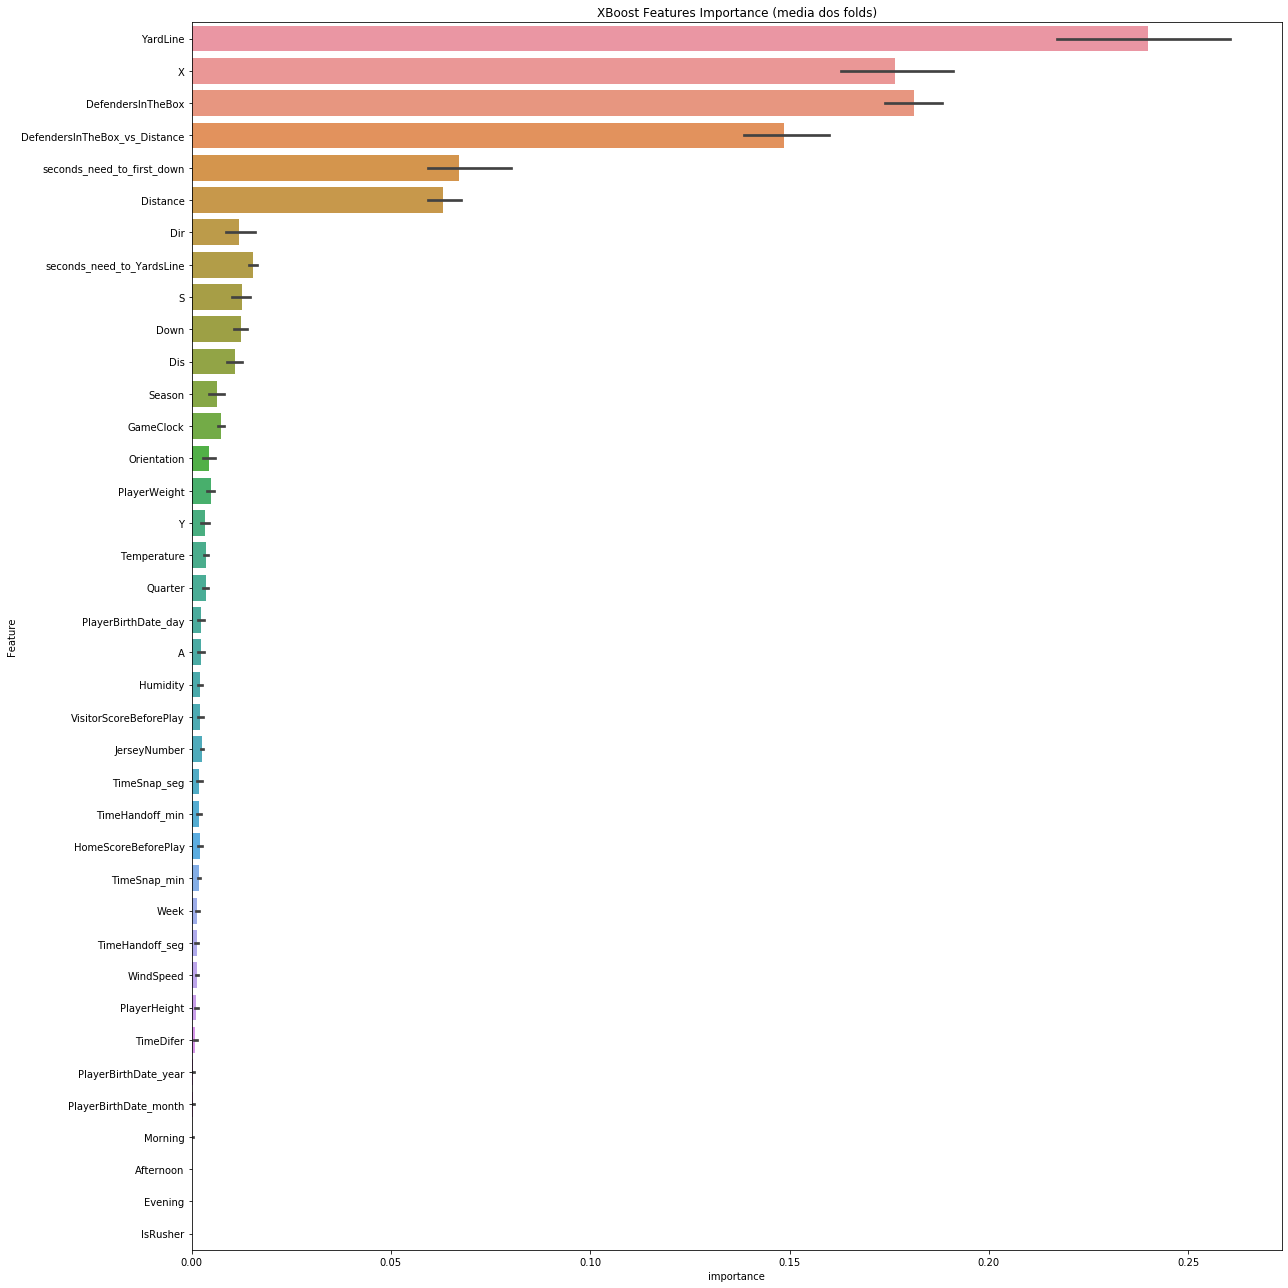

In [24]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:50].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(18,18))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('XBoost Features Importance (media dos folds)')
plt.tight_layout()

In [25]:
#_ = lgb.plot_importance(models[3], importance_type='gain')

In [26]:
# Validacao do modelo
# Imprimir o score de treino e teste

mean_rmse_tr = np.mean(tr_rmse)
std_rmse_tr =  np.std(tr_rmse)

mean_rmse_val =  np.mean(val_rmse)
std_rmse_val =  np.std(val_rmse)

all_rmse = mean_squared_error(oof,y_tr)

print("Score de Treino")
print("Média RMSE: %.5f, std: %.5f." % (mean_rmse_tr, std_rmse_tr),'\n')

print("Score de Validação")
print("Média RMSE: %.5f, std: %.5f." % (mean_rmse_val, std_rmse_val),'\n')

print("Geral: %.5f." % (all_rmse),'\n')

print("CRPS: %.6f." % (funcao_crps(y_tr,oof)[1]))

Score de Treino
Média RMSE: 1.03015, std: 0.03399. 

Score de Validação
Média RMSE: 1.03054, std: 0.13668. 

Geral: 1.03054. 

CRPS: 0.009716.


# Realizando a submissão

In [27]:
# Funcao para realizar feature engineering no dataset teste
def feature_engineering_test(df): 
    
    # Limpeza e conversao dos dados
    fill_na(df)
    
    df = fix_play_direction(df)
    df.loc[df['Season'] == 2017, 'Orientation'] = np.mod(90 + df.loc[df['Season'] == 2017, 'Orientation'], 360)

    # Converter as features de data e extrair dia, mes, ano, hora, minuto, segundo
    df['PlayerBirthDate'] = df['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    df['PlayerBirthDate_day'] = df['PlayerBirthDate'].dt.day.astype(int)
    df['PlayerBirthDate_month'] = df['PlayerBirthDate'].dt.month.astype(int)
    df['PlayerBirthDate_year'] = df['PlayerBirthDate'].dt.year.astype(int)
    df['TimeSnap'] = df['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    df['TimeSnap_min'] = df['TimeSnap'].dt.minute.astype(int)
    df['TimeSnap_seg'] = df['TimeSnap'].dt.second.astype(int)
    df['TimeHandoff'] = df['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    df['TimeHandoff_min'] = df['TimeHandoff'].dt.minute.astype(int)
    df['TimeHandoff_seg'] = df['TimeHandoff'].dt.second.astype(int)
    
    # Conversao de algumas features
    df['PlayerHeight']  = df['PlayerHeight'].apply(convert_to_cm)
    df['PlayerWeight']  = df['PlayerWeight'].apply(convert_to_kg)
    df['Temperature']   = df['Temperature'].apply(convert_to_celsius)
    df['StadiumType']   = df['StadiumType'].apply(agrupar_tipo_estadio)
    df['Stadium']       = df['Stadium'].apply(agrupar_estadio)
    df['Location']      = df['Location'].apply(agrupar_local)
    df['Turf']          = df['Turf'].apply(agrupar_gramado)
    df['WindDirection'] = df['WindDirection'].apply(agrupa_wind_direction)
    df['WindSpeed']     = df['WindSpeed'].apply(convert_wind_speed)
    df['GameWeather']   = df['GameWeather'].apply(agrupar_clima)

    # Corrigindo a feature Stadium
    df.loc[df['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
    df.loc[df['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'    
    
    # Nova feature com a diferença entre o tempo de lançamento da bola até quando o jogador captura
    df['TimeDifer'] = df.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)            
         
    # Nova feature para indicar se é o jogador que esta realizando a jogada (corredor)
    df['IsRusher'] = df['NflId'] == df['NflIdRusher']
    
    # Novas features com base no horario do jogo
    df['Morning']   = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) >=0 and int(x[0:2]) <12) else 0)
    df['Afternoon'] = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) <18 and int(x[0:2]) >=12) else 0)
    df['Evening']   = df['GameClock'].apply(lambda x : 1 if (int(x[0:2]) >= 18 and int(x[0:2]) < 24) else 0)
    df['GameClock'] = df['GameClock'].apply(str_to_seconds) 
    
    # Criando novas features com dados de Distance, YardLine e DefendersInTheBox
    df['seconds_need_to_first_down'] = (df['Distance']*0.9144)/df['Dis']
    df['seconds_need_to_YardsLine'] = (df['YardLine']*0.9144)/df['Dis']    
    df['DefendersInTheBox_vs_Distance'] = df['DefendersInTheBox'] / df['Distance']
    
    # Ordenacao do dataset e renovando o index
    df = df.sort_values(by=['PlayId', 'Team', 'IsRusher']).reset_index()
    
    # Removendo colunas que não serão utilizadas
    df = df.drop(['index','GameId','TimeHandoff','TimeSnap','PlayerBirthDate'], axis=1)

    # Removendo todas as variaveis categoricas
    drop_features = []
    for col in train_df.columns:
        if df[col].dtype =='object':
            drop_features.append(col)

    df = df.drop(drop_features, axis=1)
    df = df.drop(['PlayId','NflId','NflIdRusher'], axis=1)
    
    df.replace(cleanup_nums, inplace=True)
    
    return df

In [28]:
from kaggle.competitions import nflrush

pd.options.mode.chained_assignment = None
index = 0

env = nflrush.make_env()

for (test, sample_prediction_df) in tqdm.tqdm(env.iter_test()):
    df_test = feature_engineering_test(test)
    df_test = features_estatisticas(df_test)
    
    df_test.replace(-np.inf,0,inplace=True)
    df_test.replace(np.inf,0,inplace=True)
    df_test.fillna(0, inplace=True)
    
    count=0
    test_data = np.zeros((1,len(features)))

    for c in features:
        if c in df_test:
            try:
                test_data[0][count] = df_test[c][index]
            except:
                test_data[0][count] = np.nan
            count+=1
    
    y_pred = np.zeros(199)        
    y_pred_p = np.sum(np.round(scaler.inverse_transform([model.predict(test_data)[0] for model in models])))/kf
    y_pred_p += 99
    
    for j in range(199):
        if j>=y_pred_p+10:
            y_pred[j]=1.0
        elif j>=y_pred_p-10:
            y_pred[j]=(j+10-y_pred_p)*0.05
    
    env.predict(pd.DataFrame(data=[y_pred],columns=sample_prediction_df.columns))
    
    index += 22
    
env.write_submission_file()

print([filename for filename in os.listdir('/kaggle/working') if '.csv' in filename])

ModuleNotFoundError: No module named 'kaggle'